# Coordination Metric Comparison

- Compares CN(coordination number) for Hoppe, SANN, and fixed distance metric
- Closely packed atoms should have a coordination number of 12
- Fixed distance metric calculate a coordination number closest to closely packed atoms
- Hoppe and SANN calculated similar coordination number 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import interpolate as interp
from scipy import integrate

import ase
from ase.calculators import lj
from ase import build

from ase.md.verlet import VelocityVerlet
from ase.md.nvtberendsen import NVTBerendsen
from ase.md.velocitydistribution import MaxwellBoltzmannDistribution
from ase import units
from ase.io.trajectory import Trajectory

import atombond



In [2]:
import importlib
importlib.reload(atombond)

<module 'atombond' from 'C:\\Users\\AJoiner\\Documents\\Atomic-Bonding\\atombond.py'>

In [3]:
%matplotlib inline

In [4]:
traj_filenm = 'lj_rho0.82_T600_N500.traj'
traj = Trajectory(traj_filenm)

In [5]:
atoms=traj[-1]
dist_a=atoms.get_all_distances(mic=True)
dists_a = np.sort(dist_a)


In [6]:
Nx = 5
liq_at = atombond.get_lj_fcc_struc(super_a=[Nx,Nx,Nx],dNN=1.2,E_lj=1/40)

Nat = liq_at.get_number_of_atoms()
Vat = liq_at.get_volume()
Lat = (Vat)**(1/3)
rhoat = Nat/Vat


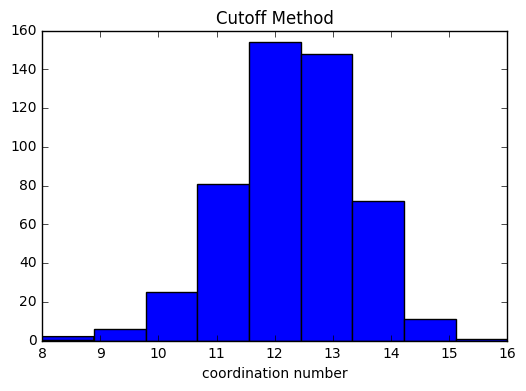

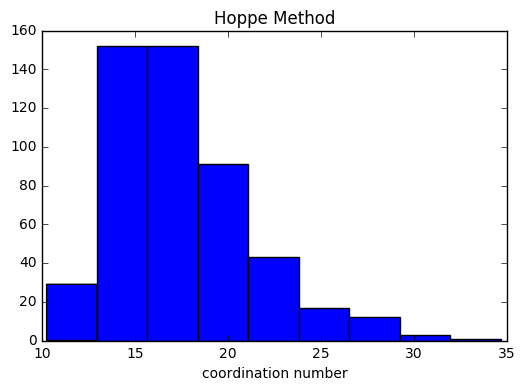

In [7]:
N = dist_a.shape[0]
cn_cutoff_a = np.zeros(N)
cn_econ_a = np.zeros(N)
for ind in np.arange(N):
    idist_a = dist_a[ind]
    icutoff = atombond.coor_cutoff(idist_a,rcut=1.5)
    iecon = atombond.coor_econ(idist_a,nexp=3)
    
    cn_cutoff_a[ind] = icutoff
    cn_econ_a[ind] = iecon
    

plt.hist(cn_cutoff_a,9)
plt.xlabel('coordination number')
plt.title('Cutoff Method')
plt.figure()

plt.hist(cn_econ_a,9)
plt.xlabel('coordination number')
plt.title('Hoppe Method')

(500, 499)
12
7.11802014739
6.49978300575


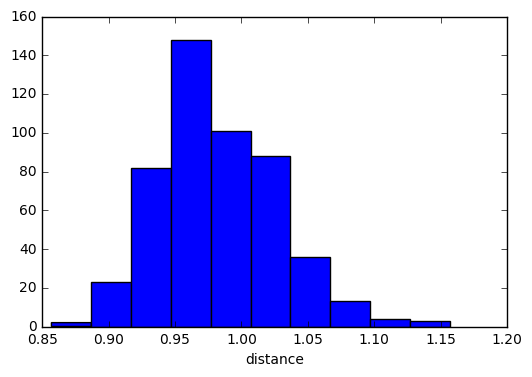

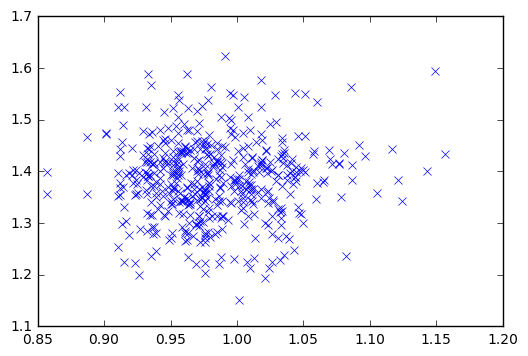

In [8]:
distalls_a=np.sort(dist_a,axis=1)[:,1:]
distalls_a[-1]
# plt.imshow(distalls_a)
plt.hist(distalls_a[:,0],10)
plt.xlabel('distance')
plt.figure()

nn_num=9

plt.plot((distalls_a[:,0]),(distalls_a[:,nn_num]), 'x')
print(distalls_a.shape)
iatom = 20
print(atombond.coor_cutoff(distalls_a[iatom]))
print(atombond.coor_econ(distalls_a[iatom]))
print(atombond.coor_sann(distalls_a[iatom]))
#print(distalls_a[:,nn_num])
#print(distalls_a[:,0])

In [9]:
#coor_num_global=atombond.calc_coor_num(rhoat,r_a,g_avg_a,rcut=1.515,debug=False,Ngrid=1001)
#print(coor_num_global)

11.344
6.56419831161
6.16694047081


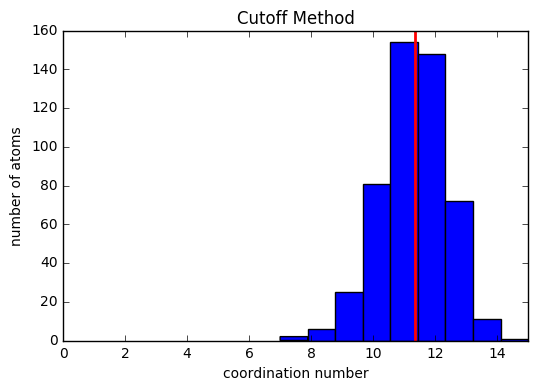

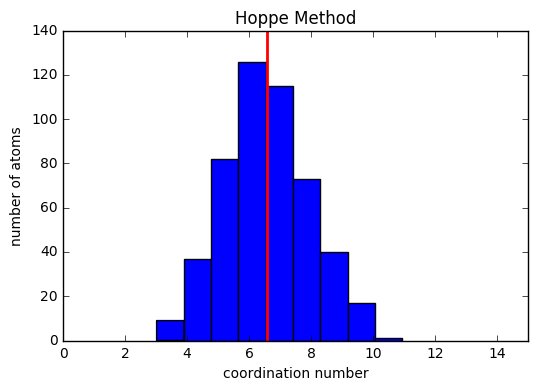

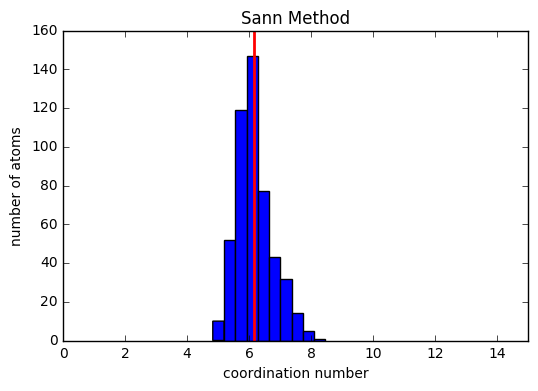

In [10]:
N = dist_a.shape[0]
cn_cutoff_a = np.zeros(N)
cn_econ_a = np.zeros(N)
cn_sann_a = np.zeros(N)
for ind in np.arange(N):
    idists_a = distalls_a[ind]
    icutoff = atombond.coor_cutoff(idists_a,rcut=1.5)
    iecon = atombond.coor_econ(idists_a)
    isann = atombond.coor_sann(idists_a)
    
    cn_cutoff_a[ind] = icutoff
    cn_econ_a[ind] = iecon
    cn_sann_a[ind]= isann


plt.hist(cn_cutoff_a,9)
plt.xlabel('coordination number')
plt.ylabel('number of atoms')
plt.title('Cutoff Method')
plt.xlim(0,15)
plt.axvline(x=np.mean(cn_cutoff_a),linewidth=2,color='r')
#plt.axvline(coor_num_global,linewidth=2,color='r',ls='dashed')
plt.figure()

plt.hist(cn_econ_a,9)
plt.xlabel('coordination number')
plt.ylabel('number of atoms')
plt.title('Hoppe Method')
plt.xlim(0,15)
plt.axvline(x=np.mean(cn_econ_a),linewidth=2,color='r')
#plt.axvline(coor_num_global,linewidth=2,color='r',ls='dashed')

plt.figure()
plt.hist(cn_sann_a,10)
plt.xlabel('coordination number')
plt.ylabel('number of atoms')
plt.title('Sann Method')
plt.xlim(0,15)
plt.axvline(x=np.mean(cn_sann_a),linewidth=2,color='r')
#plt.axvline(coor_num_global,linewidth=2,color='r',ls='dashed')

print(np.mean(cn_cutoff_a))
print(np.mean(cn_econ_a))
print(np.mean(cn_sann_a))
#print(atombond.calc_avg_pdf)